In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [3]:
data=pd.read_csv('C:/Users/MK PERUMALLA/OneDrive/Desktop/Mision 2026/DS_Stack/Data/taxi_trip_pricing.csv')
df=data.copy()

In [4]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [5]:
df.shape

(1000, 11)

In [6]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [8]:
df.duplicated().sum()

0

C:\Users\MK PERUMALLA\AppData\Local\Temp\ipykernel_14296\1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

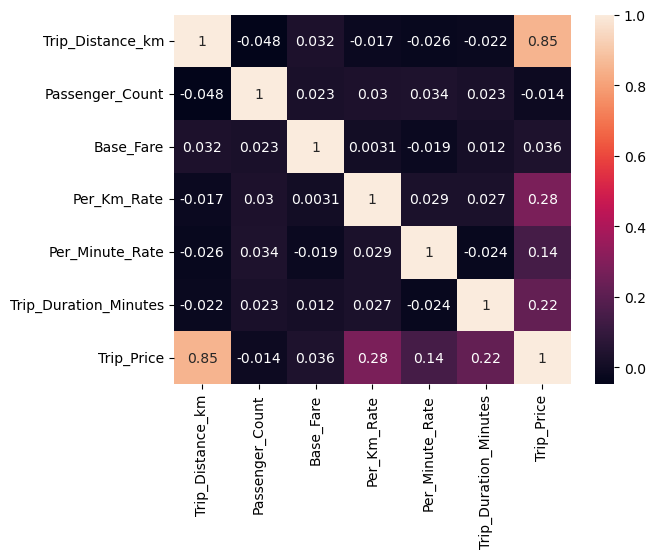

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [10]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


<Axes: >

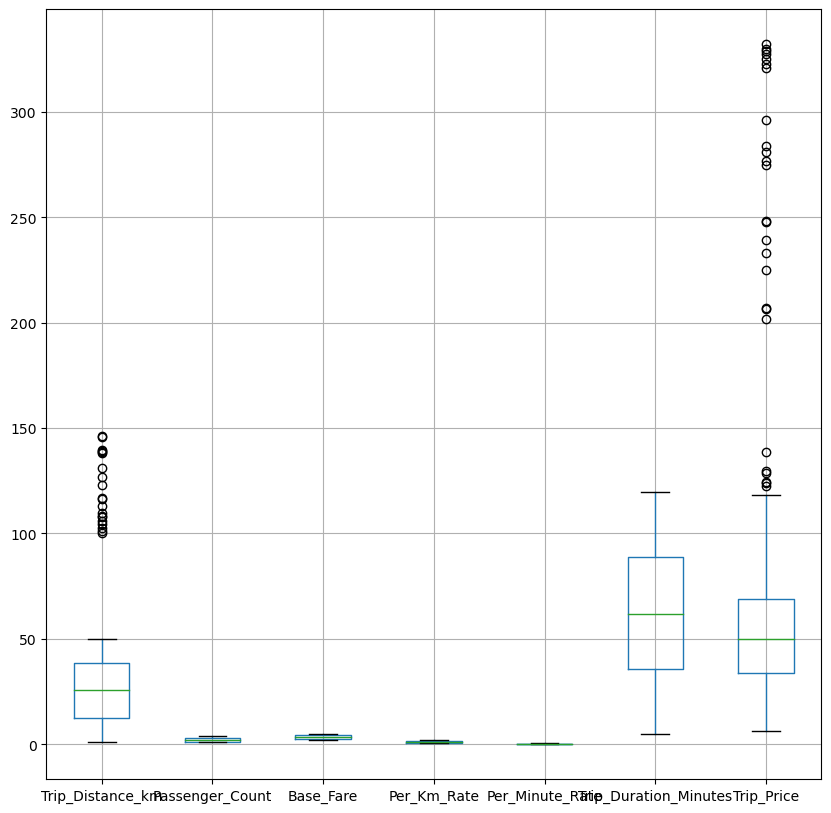

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
df.boxplot()

as there are outliers in Trip_Distance and Trip_Price, we use Median as an imputation strategy.

for rest of the columns let's use Mean as an Imputation strategy.

Finally, for the category column let's use Mode strategy.

In [12]:
df.head(1)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.8,0.32,53.82,36.2624


In [13]:
print(df.groupby(by='Passenger_Count').median())

                 Trip_Distance_km  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
Passenger_Count                                                              
1.0                        28.050      3.540         1.22             0.29   
2.0                        24.125      3.325         1.17             0.27   
3.0                        24.330      3.540         1.19             0.30   
4.0                        26.705      3.610         1.28             0.28   

                 Trip_Duration_Minutes  Trip_Price  
Passenger_Count                                     
1.0                              62.02     52.0209  
2.0                              63.45     48.0168  
3.0                              59.73     48.1365  
4.0                              62.63     53.8897  


C:\Users\MK PERUMALLA\AppData\Local\Temp\ipykernel_14296\2908237629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(by='Passenger_Count').median())


In [14]:
cat_cols=list(df.select_dtypes(include='object').columns)
cat_cols

['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

In [61]:
list(df.select_dtypes(exclude='object').columns)[:-1]

['Trip_Distance_km',
 'Passenger_Count',
 'Base_Fare',
 'Per_Km_Rate',
 'Per_Minute_Rate',
 'Trip_Duration_Minutes']

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# -- Define columns explicitly (adjust to your actual df)
numeric_cols = list(df.select_dtypes(exclude='object').columns[:-1])
target_col=list(df.select_dtypes(exclude='object').columns)[-1]
ordinal_time = ['Time_of_Day']          # will use OrdinalEncoder with explicit ordering
ordinal_day = ['Day_of_Week']
ordinal_traffic = ['Traffic_Conditions']
onehot_cols = ['Weather']               # categorical to one-hot

# ordering you intended
time_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
day_of_week = ['Weekend', 'Weekday']
traffic_condition = ['Low', 'Medium', 'High']

# numeric pipeline: impute (mean/median) then scale
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# ordinal pipelines - impute then ordinal encode
oe_time_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[time_of_day], handle_unknown='use_encoded_value', unknown_value=-1))
])

oe_day_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[day_of_week], handle_unknown='use_encoded_value', unknown_value=-1))
])

oe_traffic_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[traffic_condition], handle_unknown='use_encoded_value', unknown_value=-1))
])

# one-hot pipeline: impute then one-hot; set sparse=False to get dense array
ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

# Combine into single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('time_ord', oe_time_pipe, ordinal_time),
    ('day_ord', oe_day_pipe, ordinal_day),
    ('traffic_ord', oe_traffic_pipe, ordinal_traffic),
    ('weather_ohe', ohe_pipeline, onehot_cols)
], remainder='drop')   # or 'passthrough' if you want to keep other cols

# Final pipeline (preprocessor only here; you can add estimator later)
final_pipe = Pipeline([
    ('preproc', preprocessor),
    # ('model', SomeEstimator())   # add your estimator here
])

# Example: fit-transform on your DataFrame `X`
final_pipe.fit(df)
X_transformed = final_pipe.transform(df)


c:\Users\MK PERUMALLA\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
final_pipe

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Trip_Distance_km',
                                                   'Passenger_Count',
                                                   'Base_Fare', 'Per_Km_Rate',
                                                   'Per_Minute_Rate',
                                                   'Trip_Duration_Minutes']),
                                                 ('time_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Traffic_Conditions']),
                                                 ('weather_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Weather'])]))])

In [70]:
df.head(1)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.8,0.32,53.82,36.2624


In [71]:
processed_data=pd.DataFrame(X_transformed,columns=final_pipe.get_feature_names_out())
processed_data.head(1)

,num__Trip_Distance_km,num__Passenger_Count,num__Base_Fare,num__Per_Km_Rate,num__Per_Minute_Rate,num__Trip_Duration_Minutes,time_ord__Time_of_Day,day_ord__Day_of_Week,traffic_ord__Traffic_Conditions,weather_ohe__Weather_Rain,weather_ohe__Weather_Snow
0,0.125106,0.666667,0.518395,0.2,0.55,0.425063,0.0,1.0,0.0,0.0,0.0


In [72]:
## save pre-processed model path
import joblib
# Save pipeline as .pkl
out_path = "Saved_Models/fitted_pipeline_Taxifare.pkl"
joblib.dump(final_pipe, out_path)

['Saved_Models/fitted_pipeline_Taxifare.pkl']

Pre-Processing was Done. So let's move on to Model Building

In [73]:
mask=df['Trip_Price'].notna()
mask

0       True
1      False
2       True
3       True
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: Trip_Price, Length: 1000, dtype: bool

In [75]:
# split data into X and y
X=processed_data.loc[mask]
y=df['Trip_Price'].loc[mask]

Now, our data is completely ready for modelling.

as we are applying Linear Regression, let's check Multi collinearity, and linearity

### Multi-colinearity


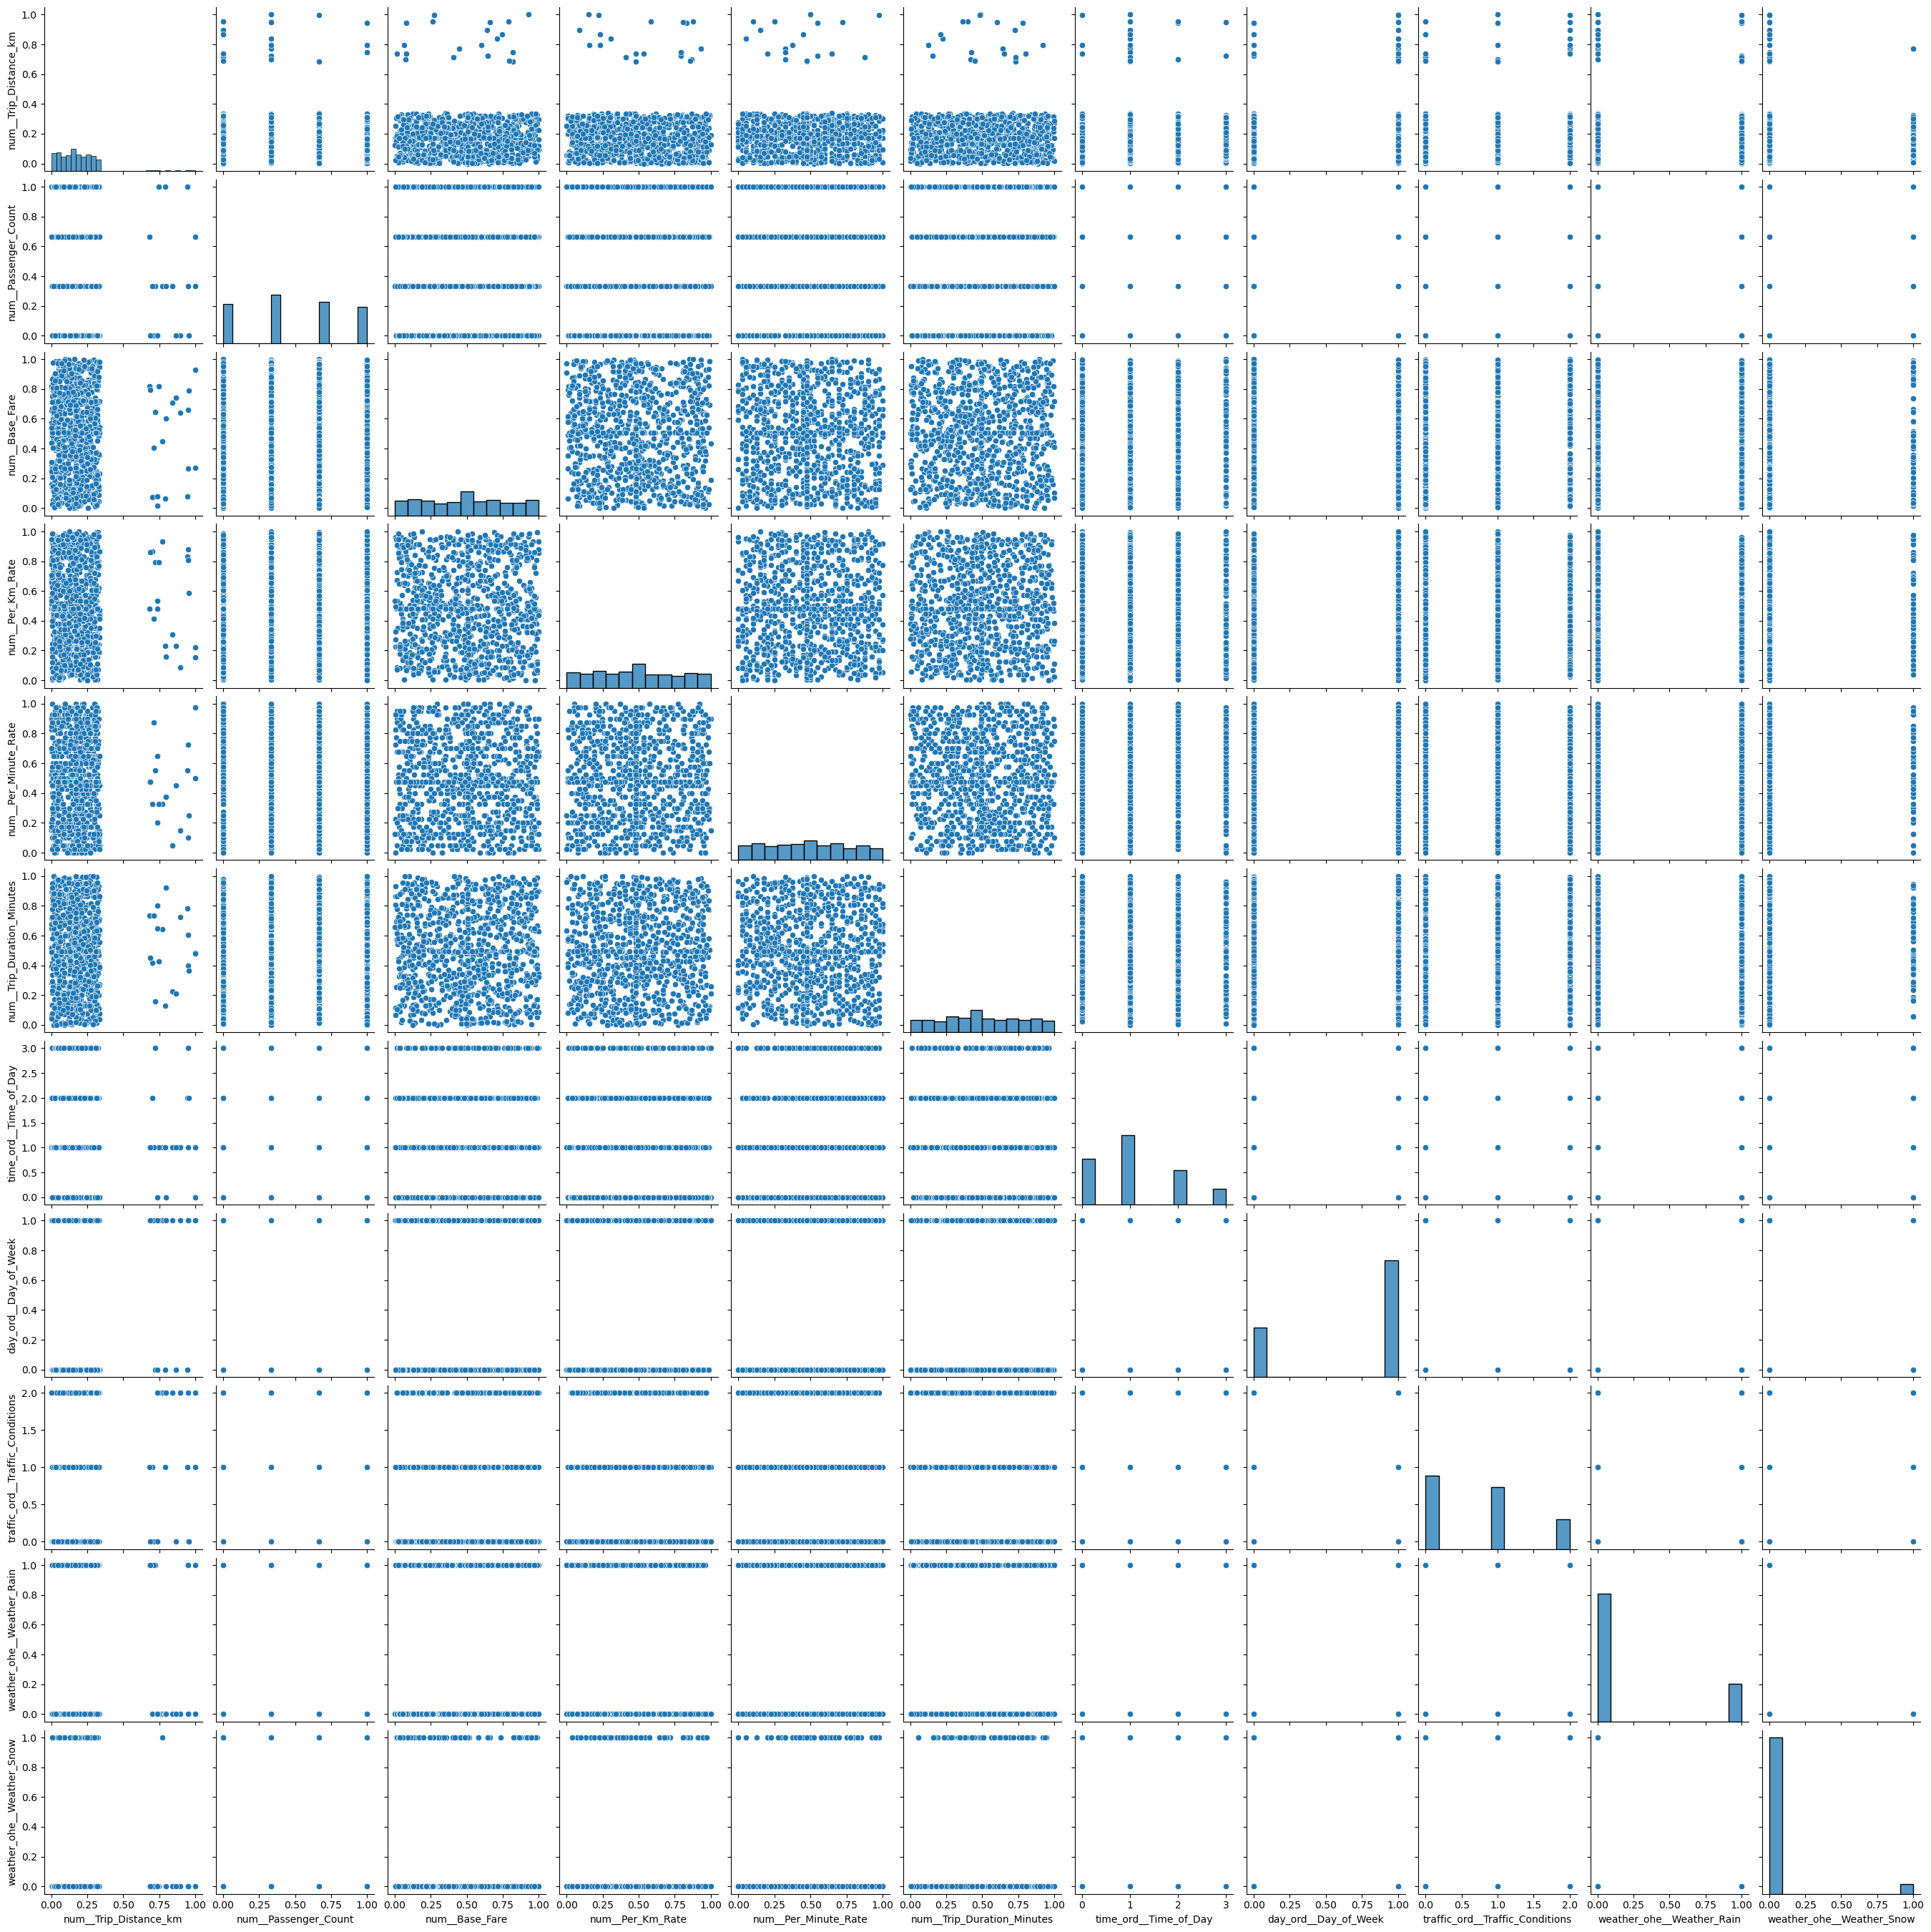

In [79]:
import seaborn as sns

sns.pairplot(X)

<Axes: >

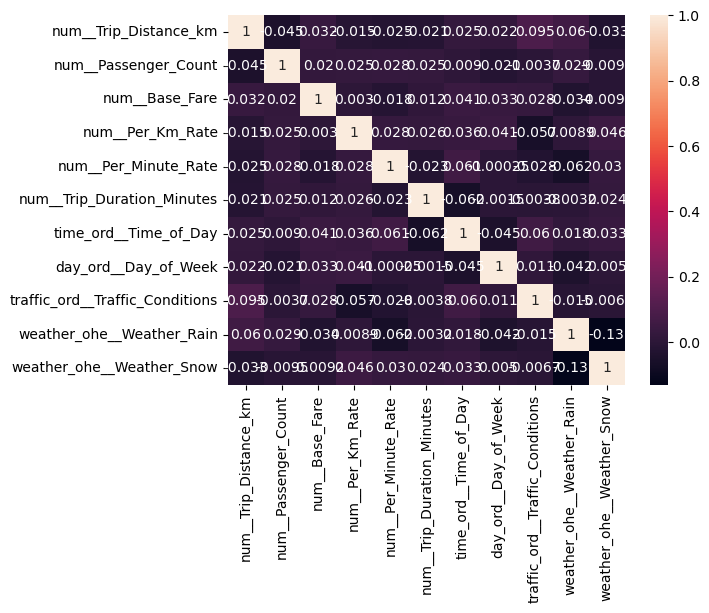

In [82]:
sns.heatmap(processed_data.corr(),annot=True)

from both pairplot and correlation heatmap we can say that there is no multi-collinearity existing,as there is no strong correlation b/w independent features.

### Linearity

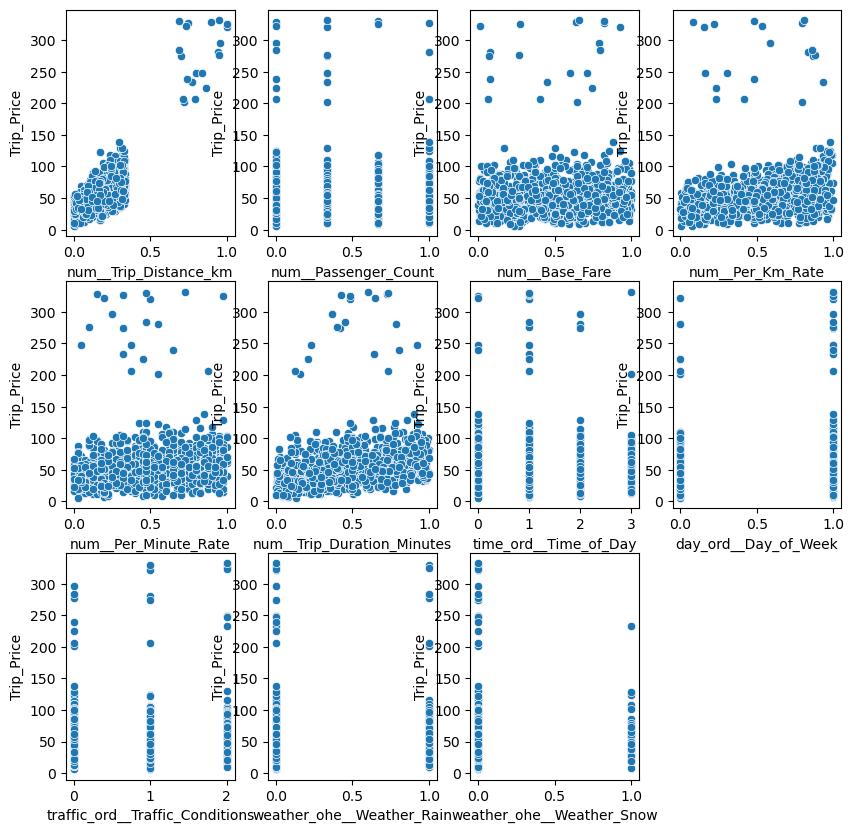

In [87]:
plt.figure(figsize=(10,10))
for i,c in enumerate(list(processed_data.select_dtypes(exclude='object').columns)):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=processed_data[c],y=y)

it's good to go for Modelling.


In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=9)

lr=LinearRegression()

lr.fit(X_train,y_train)
preds=lr.predict(X_test)


Modelling was done. now it's time to evaluate the model

#### Error

In [234]:
error=y_test-preds
error

108     3.512929
689     1.408644
914    -4.434678
290     0.214929
746    -1.274913
         ...    
204     1.088981
752    -3.385854
542    -9.048046
301    -8.919473
203   -17.248749
Name: Trip_Price, Length: 238, dtype: float64

#### Performance on unseen data(testing data)

In [235]:
r2_score(y_test,preds),np.sqrt(mean_squared_error(y_test,preds))

(0.9138035166481182, 13.468177583413034)

### Performance on Trained data(train data)

In [236]:
preds_train=lr.predict(X_train)
r2_score(y_train,preds_train),np.sqrt(mean_squared_error(y_train,preds_train))

(0.8393867724470936, 15.385421130757013)

## Assumptions

### 1. Normality of residuals

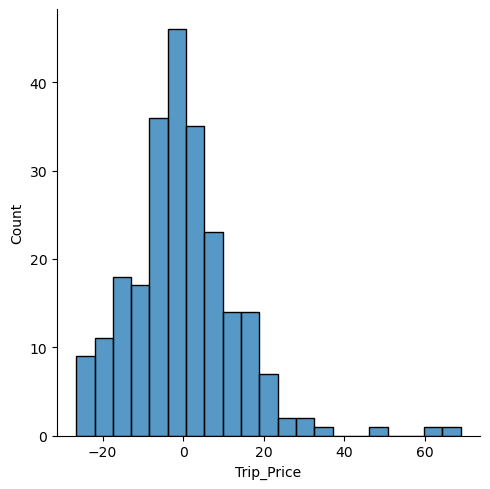

In [237]:
sns.displot(error)

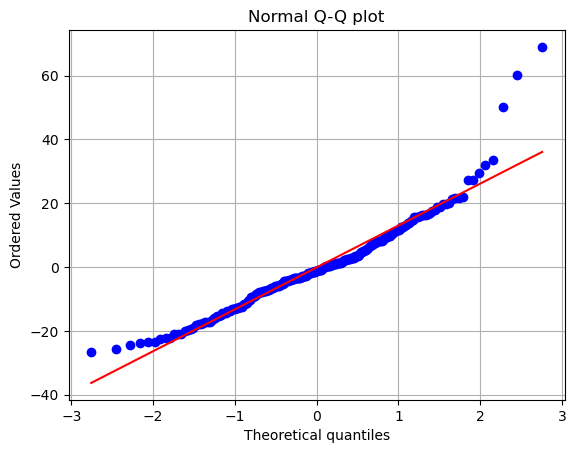

In [238]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create Q-Q plot
stats.probplot(error, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [239]:
error.mean(),error.std()

(-0.11297191721356746, 13.496086736140825)

here from the histogram and Q-Q plot the residuals are following normal distribution with mean around near to zero, and std 13.5.

so the first assumption was Passed.

### 2.Independence(Auto Correlation)

Multiple linear regression assumes that each observation in the dataset is independent.

In [240]:
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(error)
print(f"Durbin-Watson statistic: {dw_statistic}")


Durbin-Watson statistic: 1.98433819162376


The test statistic always ranges from 0 to 4 where:

d = 2 indicates no autocorrelation

d < 2 indicates positive serial correlation

d > 2 indicates negative serial correlation

here it is almost 2 so There is no Auto-Corelation

### 3.: Homoscedasticity

Multiple linear regression assumes that the residuals have constant variance at every point in the linear model. When this is not the case, the residuals are said to suffer from heteroscedasticity.

When heteroscedasticity is present in a regression analysis, the results of the regression model become unreliable.

Specifically, heteroscedasticity increases the variance of the regression coefficient estimates, but the regression model doesn’t pick up on this. This makes it much more likely for a regression model to declare that a term in the model is statistically significant, when in fact it is not.

*The simplest way to determine if this assumption is met is to create a plot of standardized residuals versus predicted values.*

*Once you fit a regression model to a dataset, you can then create a scatter plot that shows the predicted values for the response variable on the x-axis and the standardized residuals of the model on the y-axis.*








<Axes: ylabel='0'>

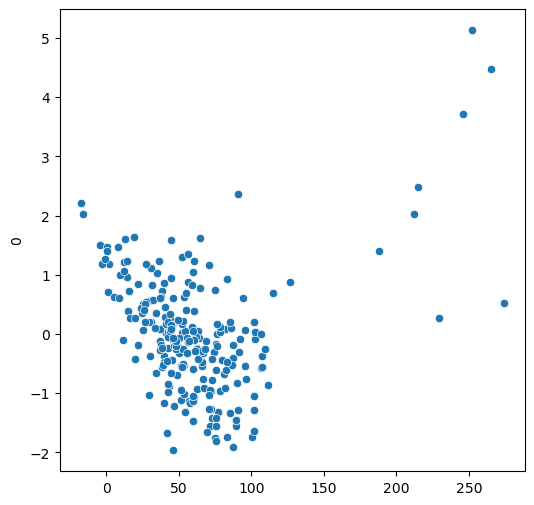

In [241]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
plt.figure(figsize=(6,6))
sns.scatterplot(x=preds,y=pd.DataFrame(sc.fit_transform(pd.DataFrame(error)[['Trip_Price']]).tolist()).iloc[:,0])

Notice that the standardized residuals are scattered about zero with no clear pattern.







### 4. Linearity

We already had checked about the linearity of variables before model building. As It should be done before model building.

### 5. Multi-Collinearity

Yes, This also should check before model building, whether any two response variables are highly correlated. Any way we can still check the VIF after the model building, which should not exceed 5 to get better predictions.

In [253]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif(df):
    vif_data=pd.DataFrame()
    vif_data['features']=df.columns
    vif_data['vif']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1]) ]
    return vif_data

vif(processed_data)

,features,vif
0,num__Trip_Distance_km,3.092434
1,num__Passenger_Count,2.921318
2,num__Base_Fare,4.342399
3,num__Per_Km_Rate,4.365648
4,num__Per_Minute_Rate,4.115799
5,num__Trip_Duration_Minutes,4.386393
6,time_ord__Time_of_Day,2.836290
7,day_ord__Day_of_Week,3.129173
8,traffic_ord__Traffic_Conditions,2.064690
9,weather_ohe__Weather_Rain,1.313554


Here, for all the columns it was under 5, so we can say that our data was free of muti-colinearity.

Finally we can say that our model was passed all the Assumptions and R2 score and RMSE are also good. so we can save the model and we can use that model in deployment.

### Final Step

save the model using pickle

In [259]:
import pickle

with open('Saved_models/Linear_Regression_Taxi_Fares.pkl','wb') as f:
    pickle.dump(lr,f)

# ----------------------THE END-------------------------